# Week 10 Assignment

We had two major areas of discussion this week.  The first was all about how to work with string data - parsing and splitting strings using basic string fuctions as well as more complex string matching using regular expressions.  The second was a basic introduction to Pandas with a few different examples of how to load data into Pandas and then visualize it using graphs (histogram, distribution, scatter, bar, timeseries).

* 36.1 - 1 point
* 36.2 - 1 point
* 38.1 - 3 points

## 36.1 String Manipulation

Write a function that will parse an address that includes one or two parts of street information, a city, a state, and a zip code -- all separated by commas.  You can assume that commas won't appear as part of the address information, only as a delimiter.  Here are some examples:

823 Pebble Street, St. Louis, MO 63105

91 Cityplace, Suite #33, St. Louis, MO 63144

81234 Homeroad, Kansas City, MO 62441


The output you should generate will be a dictionary with the following possible items.

```
{
  'street1': '91 Cityplace',
  'street2': 'Suite #33',
  'city': 'St. Louis',
  'state': 'MO',
  'zip': '63122'
}
```

Declare your function like this:
```
parse_address(address)
```

In [20]:
def parse_address(address): 
    
    comma_count = address.count(',')
    
    if comma_count == 4: 
        split_address = address.split(',')
        split_address = {
        'street1': split_address[0],
        'street2': split_address[1],
        'city': split_address[2],
        'state': split_address[3],
        'zip': split_address[4] 
    }
        return split_address
    elif comma_count == 3: 
        split_address = address.split(',')
        split_address = {
        'street1': split_address[0],
        'city': split_address[1],
        'state': split_address[2],
        'zip': split_address[3] 
    } 
        return split_address
    else: 
        return None
    
    return 

## 36.2 Test the Address Parser

Now write a series of good tests to ensure that your addres parser is going to work with a variety of different inputs.  Include at least 5 different examples.

In [26]:
assert(parse_address('823 Pebble Street, St. Louis, MO, 63105')== {'street1': '823 Pebble Street', 'city': ' St. Louis', 'state': ' MO', 'zip': ' 63105'}
)

assert(parse_address('91 Cityplace, Suite #33, St. Louis, MO, 63144')=={'street1': '91 Cityplace', 'street2': ' Suite #33', 'city': ' St. Louis', 'state': ' MO', 'zip': ' 63144'})

assert(parse_address('81234 Homeroad, Kansas City, MO, 62441')== {'street1': '81234 Homeroad', 'city': ' Kansas City', 'state': ' MO', 'zip': ' 62441'}
)

assert(parse_address('4148 Bridgehampton drive, St. Charles, MO, 63304')== {'street1': '4148 Bridgehampton drive', 'city': ' St. Charles', 'state': ' MO', 'zip': ' 63304'}
)

assert(parse_address('Ofallon, MO, 63304')== None)

## 38.1 COVID-19 Trend Data

Since we're dealing with a global pandemic right now, probably good to go ahead and do some anlysis with that data.  Take a look at what's here: https://ourworldindata.org/covid-sources-comparison

Near the middle of the page, there are two charts with some data.  On the left is "positive cases" and on the right is "deaths."  Both charts have a button that says "Data."  What you will do below is write a series of Python commands (doesn't need to be in a function) to read that data and produce a simple timeseries chart using the information from John's Hopkins.  Your code will need to read the data, possibly do some reformatting, and then produce a simple timeseries chart.

(Unfortunately, the tools used on this website don't make it easy to link to and directly download the data, so I've placed a copy in `/data/covid19.xlsx` for you to access.  This file came from one of the underlying sources: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

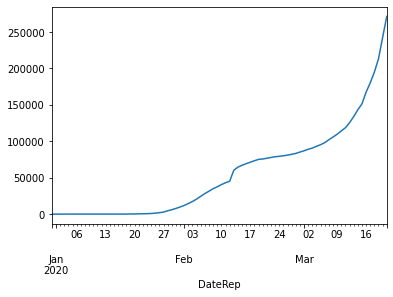

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_data = pd.read_excel('/data/covid19.xlsx')
covid_data.shape

covid_data['DateRep'] = pd.to_datetime(covid_data['DateRep'], format='%Y-%m-%d')
covid_data['Cases'] = covid_data['Cases'].astype(float)

covid_data.groupby(['DateRep'])['Cases'].sum().cumsum().plot()

One hint that you might find helpful while working on this is that the data in this file is the number of cases each week, not the running total.  You will want to plot a running total.

To do so, pandas has a `.cumsum()` method that you can use after doing a `groupby` and a `.sum()` somewhat similar to the last example of the pandas-viz.ipynb file (except in that example, it's doing a `mean()` instead of `sum()` and a `rolling()` instead of `cumsum()`.)  This link might also provide a little guidance: https://stackoverflow.com/questions/48739374/pandas-plot-cumulative-sum-of-counters-over-time

## Extra Challenges

Take the same data, but now start looking at it by country.  Do some groupbys.

Or take the same data and look at the mortality rate (deaths / total reported cases) and see how that is different by country or trending over time.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, geom_point, geom_bar ,aes, stat_smooth, facet_wrap, labs

covid_data = pd.read_excel('/data/covid19.xlsx')
covid_data.shape

total_cases = covid_data.groupby(['Countries and territories']).agg({'Cases': ['sum']})
total_deaths = covid_data.groupby(['Countries and territories']).agg({'Deaths': ['sum']})

Text(0.5, 0, 'Counties and Territories')

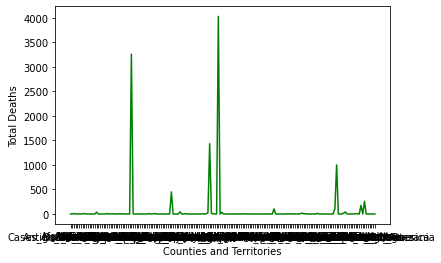

In [6]:
plt.plot(total_deaths, color = 'green')
plt.ylabel('Total Deaths')
plt.xlabel('Counties and Territories')

Text(0.5, 0, 'Counties and Territories')

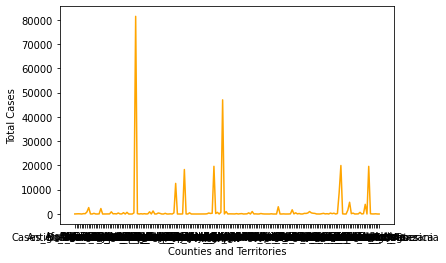

In [7]:
plt.plot(total_cases, color = 'orange')
plt.ylabel('Total Cases')
plt.xlabel('Counties and Territories')

In [8]:
usa = covid_data.loc[(covid_data["Countries and territories"]== "United_States_of_America") & 
                     (covid_data["Cases"]),
                     ["Countries and territories","Cases"]]

In [9]:
china = covid_data.loc[(covid_data["Countries and territories"]== "China") & 
                     (covid_data["Cases"]), 
                     ["Countries and territories","Cases"]]

In [10]:
italy = covid_data.loc[(covid_data["Countries and territories"]=="Italy") & 
               (covid_data["Cases"]),
               ["Countries and territories","Cases"]]

In [11]:
total_usa = usa.groupby('Cases').sum().cumsum()

In [12]:
total_china = china.groupby('Cases').sum().cumsum()

In [13]:
total_italy  = italy.groupby('Cases').sum()